In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
from collections import Counter

In [2]:
# this is a function finding the whole cluster given a single starting pixel
def fill4(x, y, n_clusters, N, A, cluster, sizes):

    stack = [(x,y)]

    while len(stack) > 0:
        x, y = stack.pop(-1)

        if A[x,y] == 1 and cluster[x,y] == -1:
            cluster[x,y] = n_clusters
            sizes[n_clusters] += 1

            if y+1 < N:
                stack.append((x,y+1))
            if y-1 >= 0:
                stack.append((x,y-1))

            if x+1 < N:
                stack.append((x+1,y))
            if x-1 >= 0:
                stack.append((x-1,y))

In [4]:
# model parameters
p = 0.59274605079210
N = 500

# site occupation matrix
A = np.random.binomial(1,p,size=(N,N))

# get occupied site coordinates
nnz = A.nonzero()

# currently there's no clusters
n_clusters = 0

# a matrix containing the cluster id of each site.
# a -1 indicates that the site does not belong to a cluster
cluster = np.zeros((N,N),dtype=int) - 1
sizes = Counter()

In [5]:
# iterate through the coordinates of the occupied sites
for i, j in zip(*nnz):

    # if the site does not yet belong to a cluster
    if cluster[i,j] < 0:

        # find the whole cluster this site belongs to
        fill4(i,j, n_clusters, N, A, cluster, sizes)

        # increase the total number of clusters
        n_clusters += 1


In [6]:
# remap the cluster ids to some random id such that the colors in the end product are 
# mixed up
new_mapping = np.arange(0,n_clusters)
np.random.shuffle(new_mapping)
cluster = np.array([new_mapping[v] if not v == -1 else np.nan for v in cluster.flat]).reshape(N,N)

# count the number of clusters of size m
all_sizes = Counter(list(sizes.values()))
x = np.arange(1,N**2+1)
y = [all_sizes[s] for s in x]

# get size of largest cluster
max_size = max(all_sizes.keys())


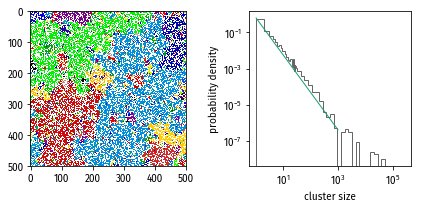

In [7]:
# create new figures
fig, ax = pl.subplots(1,2,figsize=(6,3))

ax[0].imshow(cluster,cmap='nipy_spectral')

# create a histogram with first linear, then logarithmic bin sizes
bin_edges = np.arange(1,30).tolist()+np.logspace(1.5,np.log10(N**2),30).tolist()

# plot the histogram
ax[1].hist(list(sizes.values()),bins=bin_edges,density=True,histtype='step')
# compare to expectation
ax[1].plot(x[x<1000],x[x<1000]**(-187/91)/sum(x**(-187/91)),'-')

ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[1].set_xlabel('cluster size')
ax[1].set_ylabel('probability density')

fig.tight_layout()
fig.savefig("critical_point.png",dpi=300)